#<font color='blue'>EDA for Trip Advisor Data set</font> 

**Steps involved**


1. Importing Necessary Libraries
2. Importing the dataset
3. Converting Rating to sentiment.
4. Data Visualisation

**Charts used:**

1. Countplot of Ratings.
2. Hiostogram of Ratings.
3. Piechart of Sentiment and Count plot of sentiment.
4. Most common words used in the dataset.
5. Unigrams for each sentiment.
6. Bigrams for eahc sentiment.
7. Trigrams for each sentiment.
8. Distirbution length of sentiment of reviews.
9. Countplot of each sentiment.
10. Stripplot for each sentiment.
11. Wordcloud for each sentiment.


## <font color="blue">Step 1: Importing Necessary Libraries</font>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import nltk 
nltk.download("stopwords")  
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp


from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
import copy




# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import plotly.io as pio
pio.renderers.default = "colab"

In [3]:
  import nltk
  nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## <font color = blue> Step 2:Importing the dataset </font>

In [4]:
df=pd.read_csv("tripadvisor_hotel_reviews.csv")

In [5]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## <font color='blue'> Step 3: Converting Rating to Sentiment </font>

In [6]:
# label encode
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2
    
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"
    

In [7]:
# encode label and mapping label name
df["label"] = df["Rating"].apply(lambda x: label_encode(x))
df["sentiment"] = df["label"].apply(lambda x: label2name(x))

In [ ]:
df.head()

,Review,Rating,label,sentiment
0,nice hotel expensive parking got good deal sta...,4,2,Positive
1,ok nothing special charge diamond member hilto...,2,0,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,1,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,2,Positive
4,"great stay great stay, went seahawk game aweso...",5,2,Positive


## <font color='blue'> Step 4:Data Visualisation </font>

## <font color="blue"> 1. Countplot of Ratings </font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Ratings of Hotels')

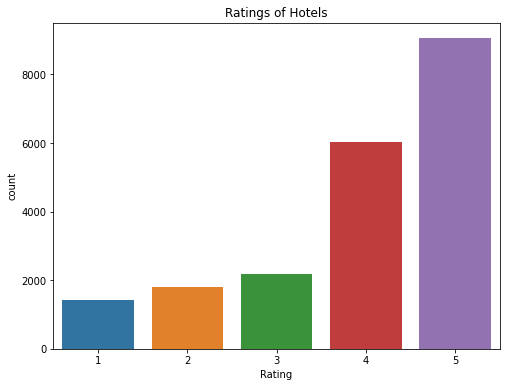

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df["Rating"])
plt.title("Ratings of Hotels")

## <font color="blue"> 2. Histogram of Review Ratings </font>

In [ ]:
# count of ratings
fig = px.histogram(df,
             x = 'Rating',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'Rating',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

## <font color="blue"> 3. Piechart of sentiment and Countplot of sentiment </font>

In [8]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['green', 'red', 'orange'] # darkorange
fig.add_trace(go.Pie(labels=df.sentiment.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.sentiment.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()



In [ ]:
df.head()

,Review,Rating,label,sentiment
0,nice hotel expensive parking got good deal sta...,4,2,Positive
1,ok nothing special charge diamond member hilto...,2,0,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,1,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,2,Positive
4,"great stay great stay, went seahawk game aweso...",5,2,Positive


In [9]:
# Calculate character count for each review
df['char_count'] = df['Review'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

## <font color="blue"> 4. Most Common Words </font>

In [10]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

In [11]:
# tokenize data
df["tokenized_review"] = df.Review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

In [12]:
df['tokenized_review'] = df['tokenized_review'].apply(lambda x: remove_punct(x))

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
texts = df['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(255,165,0, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="callibri",
        size=16,
        color="Blue"
    ))

fig.show()

In [15]:
colors = ['red', 'orange', 'green']

## <font color="blue"> 5.Unigrams for each sentiment</font>

In [16]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=500,title=dict(
        text='<b>Most Common Unigrams per Sentiment</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="callibri",
        size=24,
        color="Green"
        )
    ),)


fig.show()

## <font color="blue"> 6.Bigrams for each sentiment</font>

In [17]:
  def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]


In [18]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=500,title=dict(
        text='<b>Most Common Bigrams per Sentiment</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="callibri",
        size=24,
        color="Blue"
        )
    ))      
fig.show()


## <font color="blue"> 7.Trigrams for each sentiment </font>

In [29]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=3000,
    height=500,title=dict(
        text='<b>Most Common trigrams per Sentiment</b>',
        x=0.5,
        y=0.90,
        font=dict(
        family="callibri",
        size=24,
        color="Blue"
        )
    ))
    
fig.show()


##  <font color="blue"> 8.Distribution Length of Sentiment of Reviews </font>

count    15093.000000
mean        99.488571
std         97.993089
min          7.000000
25%         46.000000
50%         73.000000
75%        118.000000
max       1755.000000
Name: Length, dtype: float64

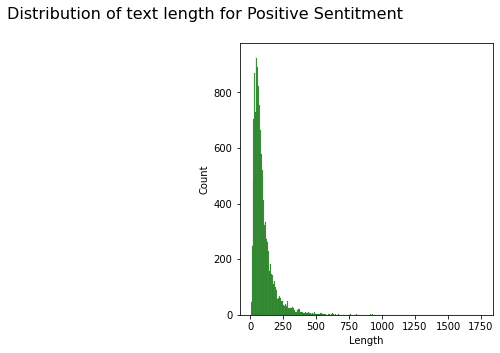

In [23]:
fig = plt.figure(figsize=(10,5))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=="Positive"]['Length'], ax=ax1,color='green')
fig.suptitle('Distribution of text length for Positive Sentitment', fontsize=16)
display(df.Length[df.sentiment=="Positive"].describe())

count    3214.000000
mean      120.307094
std       104.846676
min        10.000000
25%        58.000000
50%        90.000000
75%       145.000000
max      1109.000000
Name: Length, dtype: float64

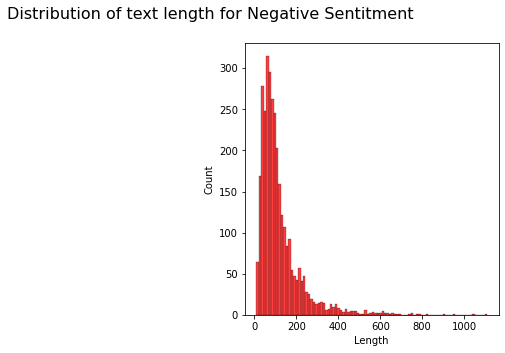

In [24]:
fig = plt.figure(figsize=(10,5))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=="Negative"]['Length'], ax=ax1,color='red')
fig.suptitle('Distribution of text length for Negative Sentitment', fontsize=16)
display(df.Length[df.sentiment=="Negative"].describe())

count    2184.000000
mean      114.705586
std       109.023017
min         9.000000
25%        54.000000
50%        86.000000
75%       134.000000
max      1931.000000
Name: Length, dtype: float64

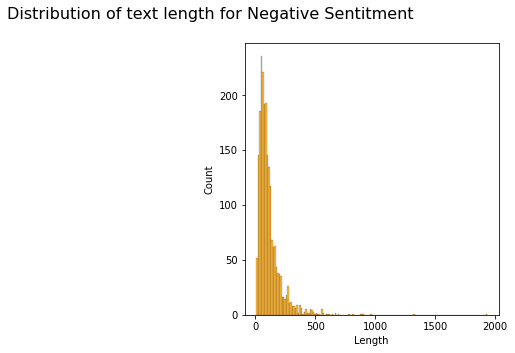

In [25]:
fig = plt.figure(figsize=(10,5))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=="Neutral"]['Length'], ax=ax1,color='orange')
fig.suptitle('Distribution of text length for Negative Sentitment', fontsize=16)
display(df.Length[df.sentiment=="Neutral"].describe())

## <font color="blue"> 9.Count plot of sentiment of reviews </font>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Sentiment of Reviews')

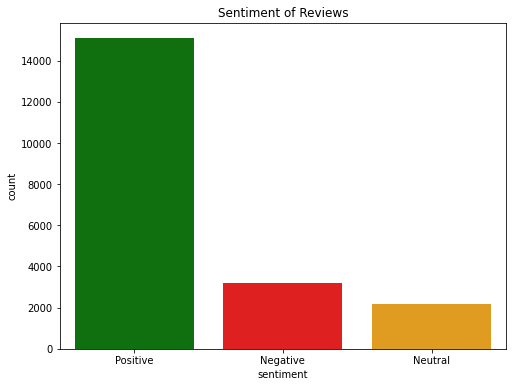

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df["sentiment"],palette=['green',"red","orange"])
plt.title("Sentiment of Reviews")

## <font color="blue"> 10. Stripplot of sentiment of reviews </font>

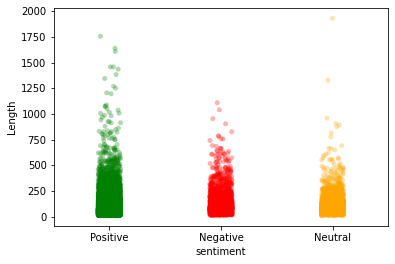

In [ ]:
sns.stripplot(data=df, x='sentiment', y='Length', palette=['green','red','orange'], alpha=0.3)

## <font color="blue"> 11.WordCloud for each sentiment </font>

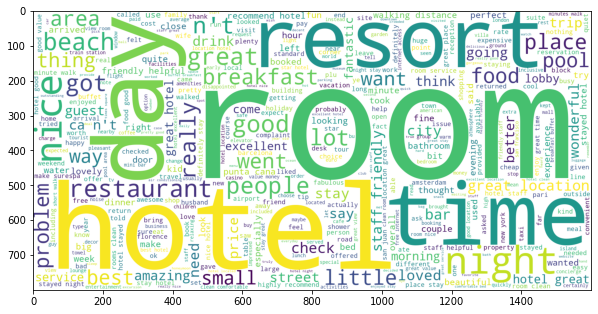

In [ ]:
plt.figure(figsize=(10,10))
wc_positive = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(df[df["sentiment"]=="Positive"].Review))
plt.imshow(wc_positive)

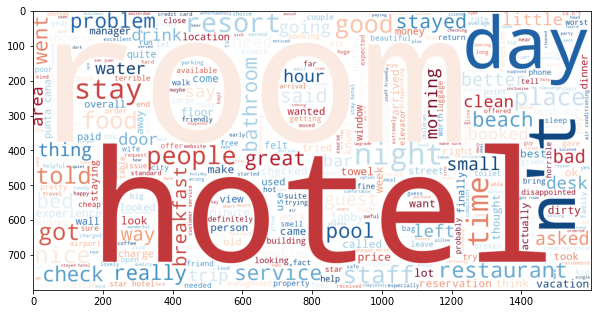

In [ ]:
plt.figure(figsize=(10,10))
wc_negative = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white",colormap='RdBu_r').generate(" ".join(df[df["sentiment"]=="Negative"].Review))
plt.imshow(wc_negative)

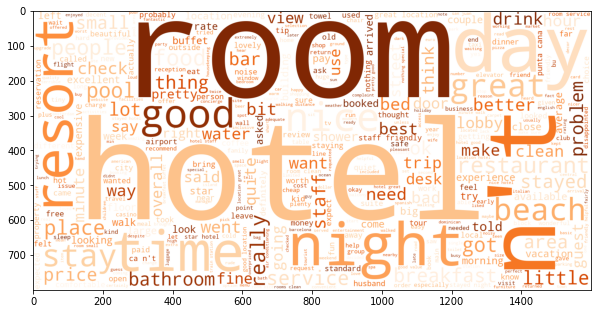

In [32]:
plt.figure(figsize=(10,10))
wc_neutral = WordCloud(max_words=2000, min_font_size=10,height=800,width=1600,background_color="white",colormap='Oranges').generate(" ".join(df[df["sentiment"]=="Neutral"].Review))
plt.imshow(wc_neutral)